In [31]:
#General imports
import pandas as pd
import boto3
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_columns', 200)
%matplotlib inline
from matplotlib import colors

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('FIRMSandSCANFull2018toApr2022_V2.csv')

In [3]:
#unnamed seems to be a column brought in that we dont want.
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'acq_date', 'acq_time', 'satellite', 'instrument', 'version', 
             'lat', 'long', 'hour', 'date_loc', 'date_hour_loc', 'newdate', 'nearestStation', 'StationDist',
             'Station Id', 'Network Code', 'Wind Speed Average 324in (mph)', 'Wind Speed Average 128in (mph)', 'date_new'], axis = 1)

In [4]:
# get datetime formula
df['Year'] = pd.to_datetime(df['newdatetime']).dt.year
df['Month'] = pd.to_datetime(df['newdatetime']).dt.month_name().str[:3]
df.head()

,latitude,longitude,brightness,scan,track,confidence,bright_t31,frp,daynight,type,Date,State Code,Station Name,Elevation (ft),Latitude,Longitude,County Name,HUC2 Name,HUC4 Name,HUC6 Name,HUC8 Name,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Month-to-date (in) Start of Day Values,Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Soil Moisture Percent -4in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),time,newdatetime,nearbydetections,Year,Month
0,33.4856,-90.2127,319.4,1.4,1.2,98,267.5,38.3,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04:27,2018-01-01 04:27:00,0.0,2018,Jan
1,44.3762,-119.1190,312.5,1.2,1.1,85,269.1,21.9,N,0.0,2018-01-01,OH,Molly Caren #1,1060.0,39.95000,-83.45000,Madison,Ohio Region,Scioto,Scioto,Lower Scioto,11.5,0.0,NaN,2.0,36.1,36.4,78.0,7.1,06:08,2018-01-01 06:08:00,0.0,2018,Jan
2,19.4122,-155.2699,309.6,3.9,1.8,67,284.0,90.7,N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:19,2018-01-01 09:19:00,5.0,2018,Jan
3,19.3431,-155.0508,309.8,4.0,1.9,68,289.9,82.0,N,1.0,2018-01-01,IL,Mason #1,570.0,40.31667,-89.90000,Mason,Upper Mississippi Region,Lower Illinois,Lower Illinois,Lower Illinois-Lake Chautauqua,7.8,0.0,NaN,-8.0,4.9,6.2,66.0,1.8,09:19,2018-01-01 09:19:00,5.0,2018,Jan
4,19.3853,-155.0768,312.8,4.0,1.9,80,287.1,103.7,N,1.0,2018-01-01,AR,Uapb-Earle,213.0,35.27732,-90.45031,Crittenden,Lower Mississippi Region,Lower Mississippi-St. Francis,St. Francis,Lower St. Francis,11.3,0.0,7.6,14.0,26.9,34.0,79.0,10.5,09:19,2018-01-01 09:19:00,5.0,2018,Jan


In [5]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

<AxesSubplot:>

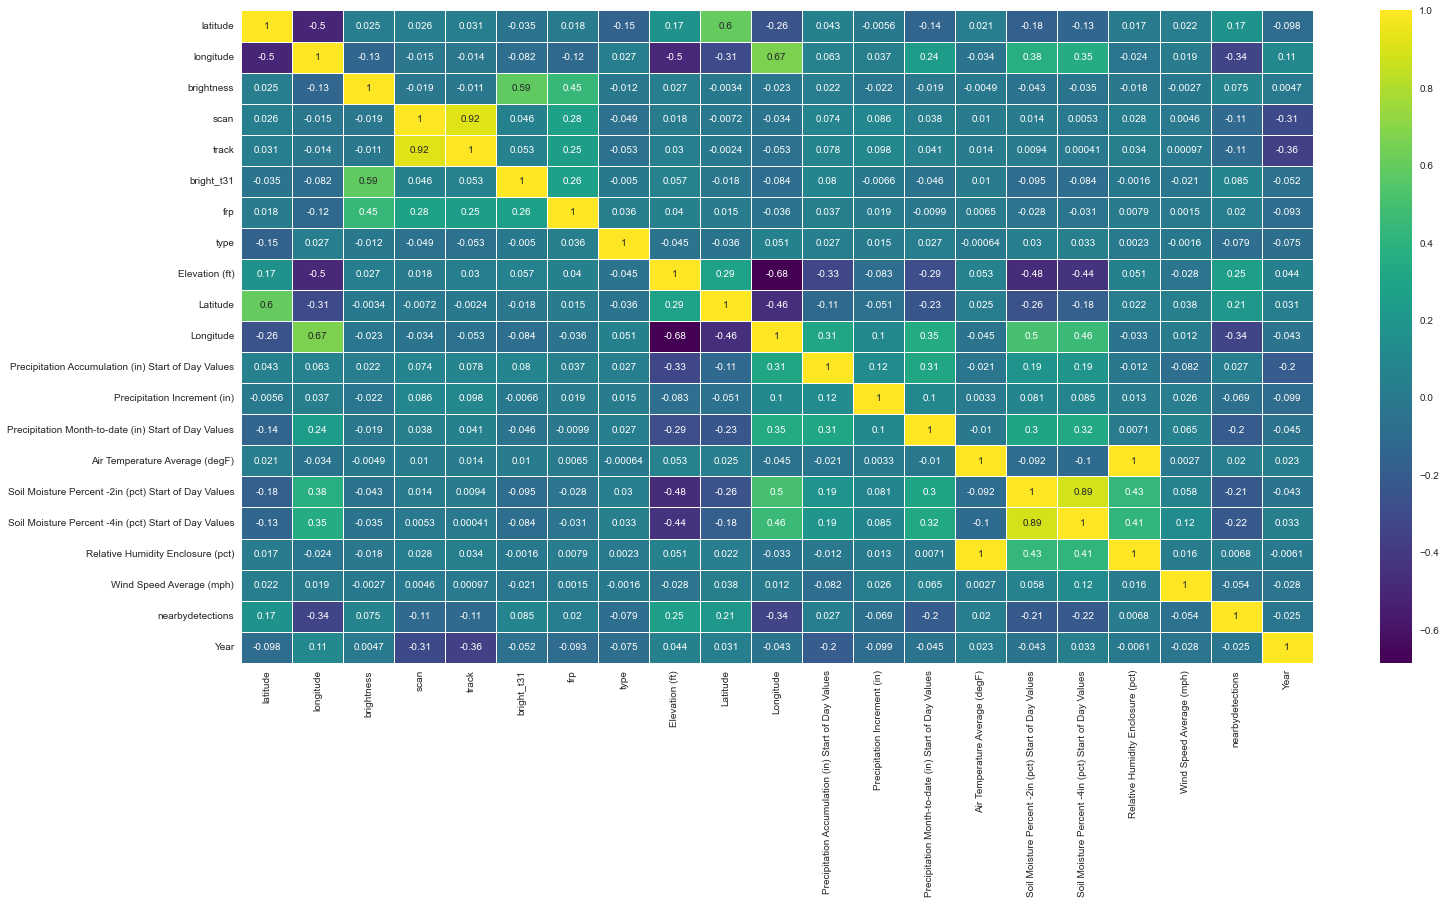

In [6]:
plt.figure(figsize=(24, 12))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [7]:
# Correlation Analysis of key intensity indicators
x_values = df['brightness']
y_values = df['frp']
z_values = df['bright_t31']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of Brightness and FRP: {r_squared1:.9f}")
print(f"R2 Correlation of Brightness and Bright_t31: {r_squared2:.9f}")
print(f"R2 Correlation of FRP and Bright_t31: {r_squared3:.9f}")

R2 Correlation of Brightness and FRP: 0.200056754
R2 Correlation of Brightness and Bright_t31: 0.345154537
R2 Correlation of FRP and Bright_t31: 0.070083621


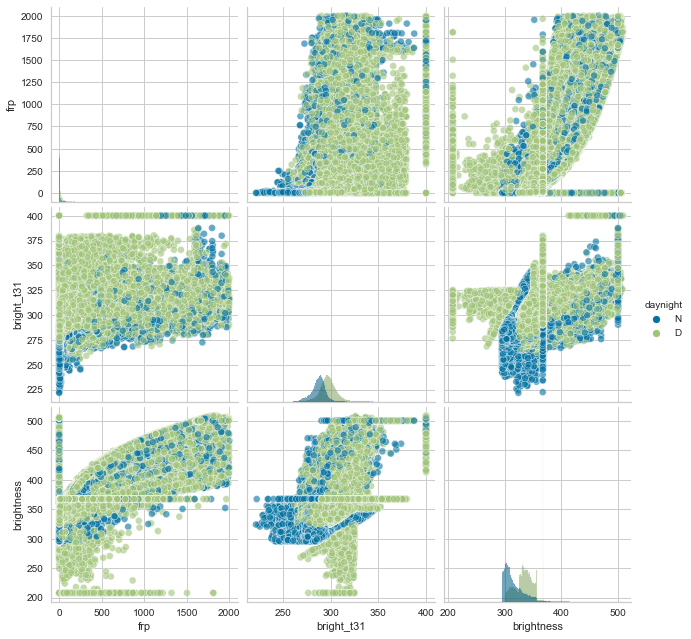

In [8]:
selected_intensity = df[df['frp'] < 2000]
g = sns.pairplot(selected_intensity, height=3, diag_kind="hist",
                 vars=['frp','bright_t31','brightness'], hue="daynight", plot_kws = {'alpha': 0.6})

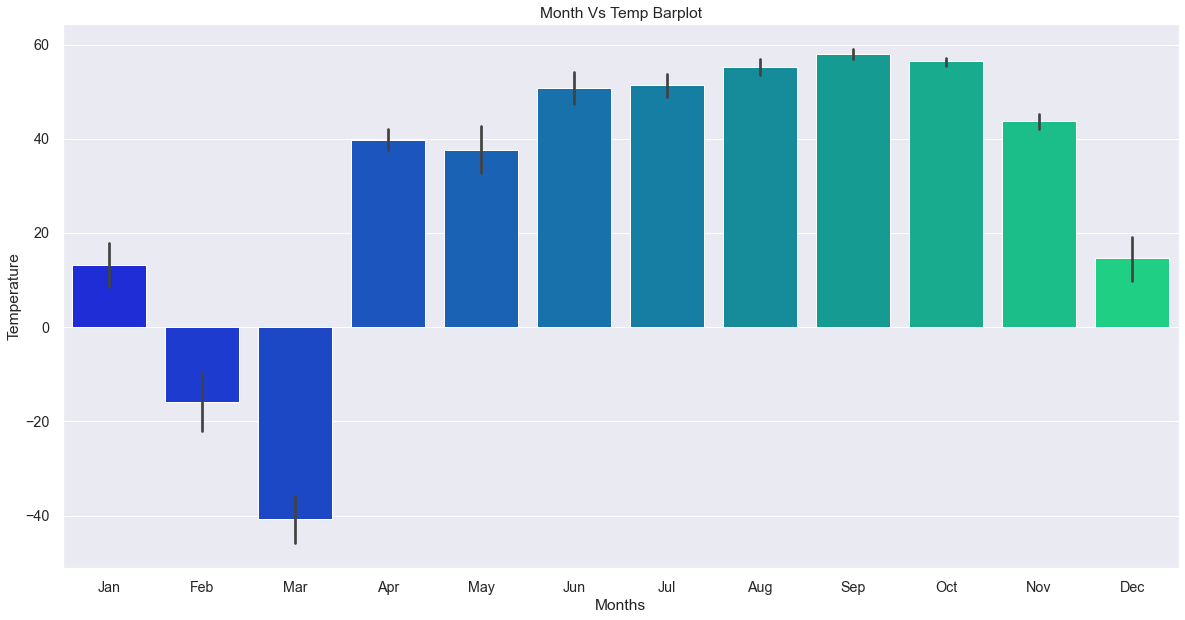

In [9]:
# Month Vs Temperature Barplot

# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'Month', y = 'Air Temperature Average (degF)', data = df,
                         order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [10]:
from scipy import stats

lin_reg = stats.linregress(x=df["nearbydetections"], y=df["brightness"])
print(lin_reg)

LinregressResult(slope=0.0008803000300763873, intercept=327.0265995170607, rvalue=0.07534289057423575, pvalue=0.0, stderr=8.05714890524267e-06, intercept_stderr=0.017287504646750516)


In [11]:
slope = lin_reg[0]
intercept = lin_reg[1]
r_value = lin_reg[2]
print(f"y = {slope}x + {intercept}")
print(f"Correlation Coefficient r: {r_value}")

y = 0.0008803000300763873x + 327.0265995170607
Correlation Coefficient r: 0.07534289057423575


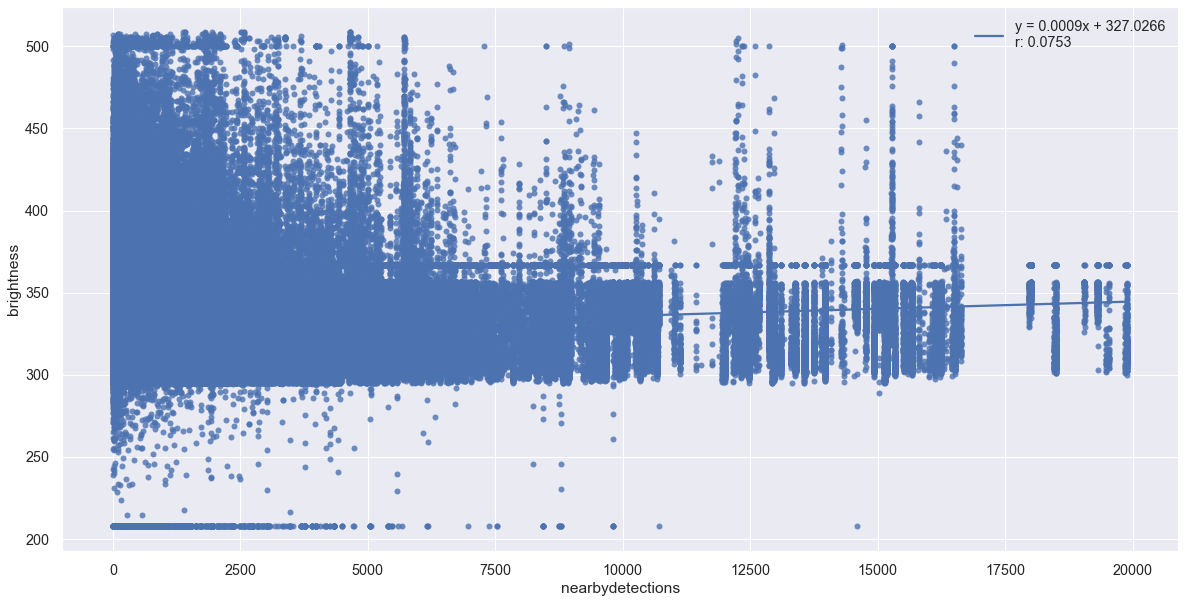

In [12]:
# insert the actual values for slope, intercept, and r_value
ax = sns.regplot(x="nearbydetections", y="brightness", data=df, ci=None, 
                 line_kws={'label':f"y = {slope:.4f}x + {intercept:.4f}\nr: {r_value:.4f}"})
ax.legend()
plt.show()

In [13]:
# make the timestamp the index
time_df = df.set_index("newdatetime")
time_df.head()

,latitude,longitude,brightness,scan,track,confidence,bright_t31,frp,daynight,type,Date,State Code,Station Name,Elevation (ft),Latitude,Longitude,County Name,HUC2 Name,HUC4 Name,HUC6 Name,HUC8 Name,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Precipitation Month-to-date (in) Start of Day Values,Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Soil Moisture Percent -4in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),time,nearbydetections,Year,Month
newdatetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 04:27:00,33.4856,-90.2127,319.4,1.4,1.2,98,267.5,38.3,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04:27,0.0,2018,Jan
2018-01-01 06:08:00,44.3762,-119.1190,312.5,1.2,1.1,85,269.1,21.9,N,0.0,2018-01-01,OH,Molly Caren #1,1060.0,39.95000,-83.45000,Madison,Ohio Region,Scioto,Scioto,Lower Scioto,11.5,0.0,NaN,2.0,36.1,36.4,78.0,7.1,06:08,0.0,2018,Jan
2018-01-01 09:19:00,19.4122,-155.2699,309.6,3.9,1.8,67,284.0,90.7,N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:19,5.0,2018,Jan
2018-01-01 09:19:00,19.3431,-155.0508,309.8,4.0,1.9,68,289.9,82.0,N,1.0,2018-01-01,IL,Mason #1,570.0,40.31667,-89.90000,Mason,Upper Mississippi Region,Lower Illinois,Lower Illinois,Lower Illinois-Lake Chautauqua,7.8,0.0,NaN,-8.0,4.9,6.2,66.0,1.8,09:19,5.0,2018,Jan
2018-01-01 09:19:00,19.3853,-155.0768,312.8,4.0,1.9,80,287.1,103.7,N,1.0,2018-01-01,AR,Uapb-Earle,213.0,35.27732,-90.45031,Crittenden,Lower Mississippi Region,Lower Mississippi-St. Francis,St. Francis,Lower St. Francis,11.3,0.0,7.6,14.0,26.9,34.0,79.0,10.5,09:19,5.0,2018,Jan


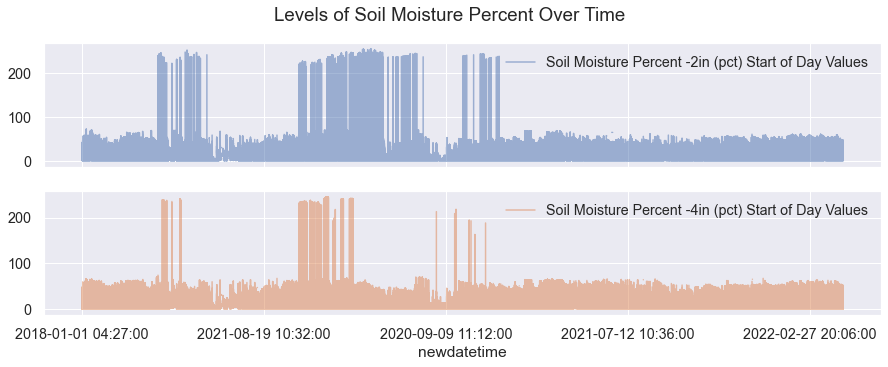

In [14]:
axes = time_df[["Soil Moisture Percent -2in (pct) Start of Day Values", "Soil Moisture Percent -4in (pct) Start of Day Values"]].plot(
    alpha=0.5, 
    x_compat=True,
    subplots=True,
    figsize=(15, 5),
    title="Levels of Soil Moisture Percent Over Time"
)

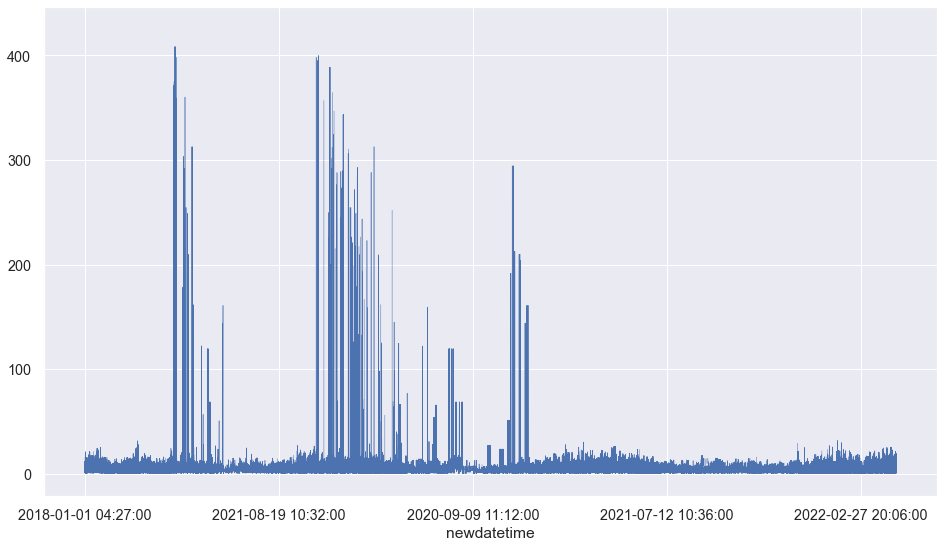

In [15]:
## Do a time series plot to look for trends
time_df["Wind Speed Average (mph)"].plot(linewidth=0.5, figsize=(16, 9));

<AxesSubplot:>

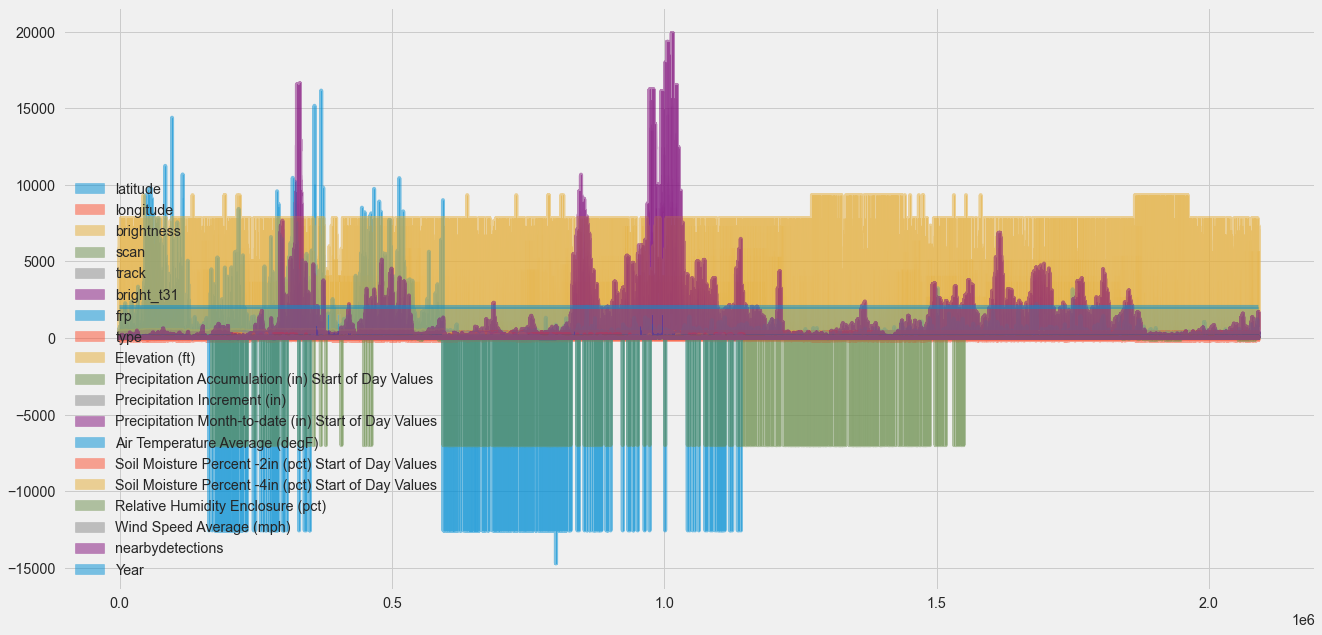

In [16]:
new_df = df.drop(['Latitude', 'Longitude'], axis=1)
matplotlib.style.use('fivethirtyeight')
new_df.plot(kind='area', stacked=False,figsize=[20,10])

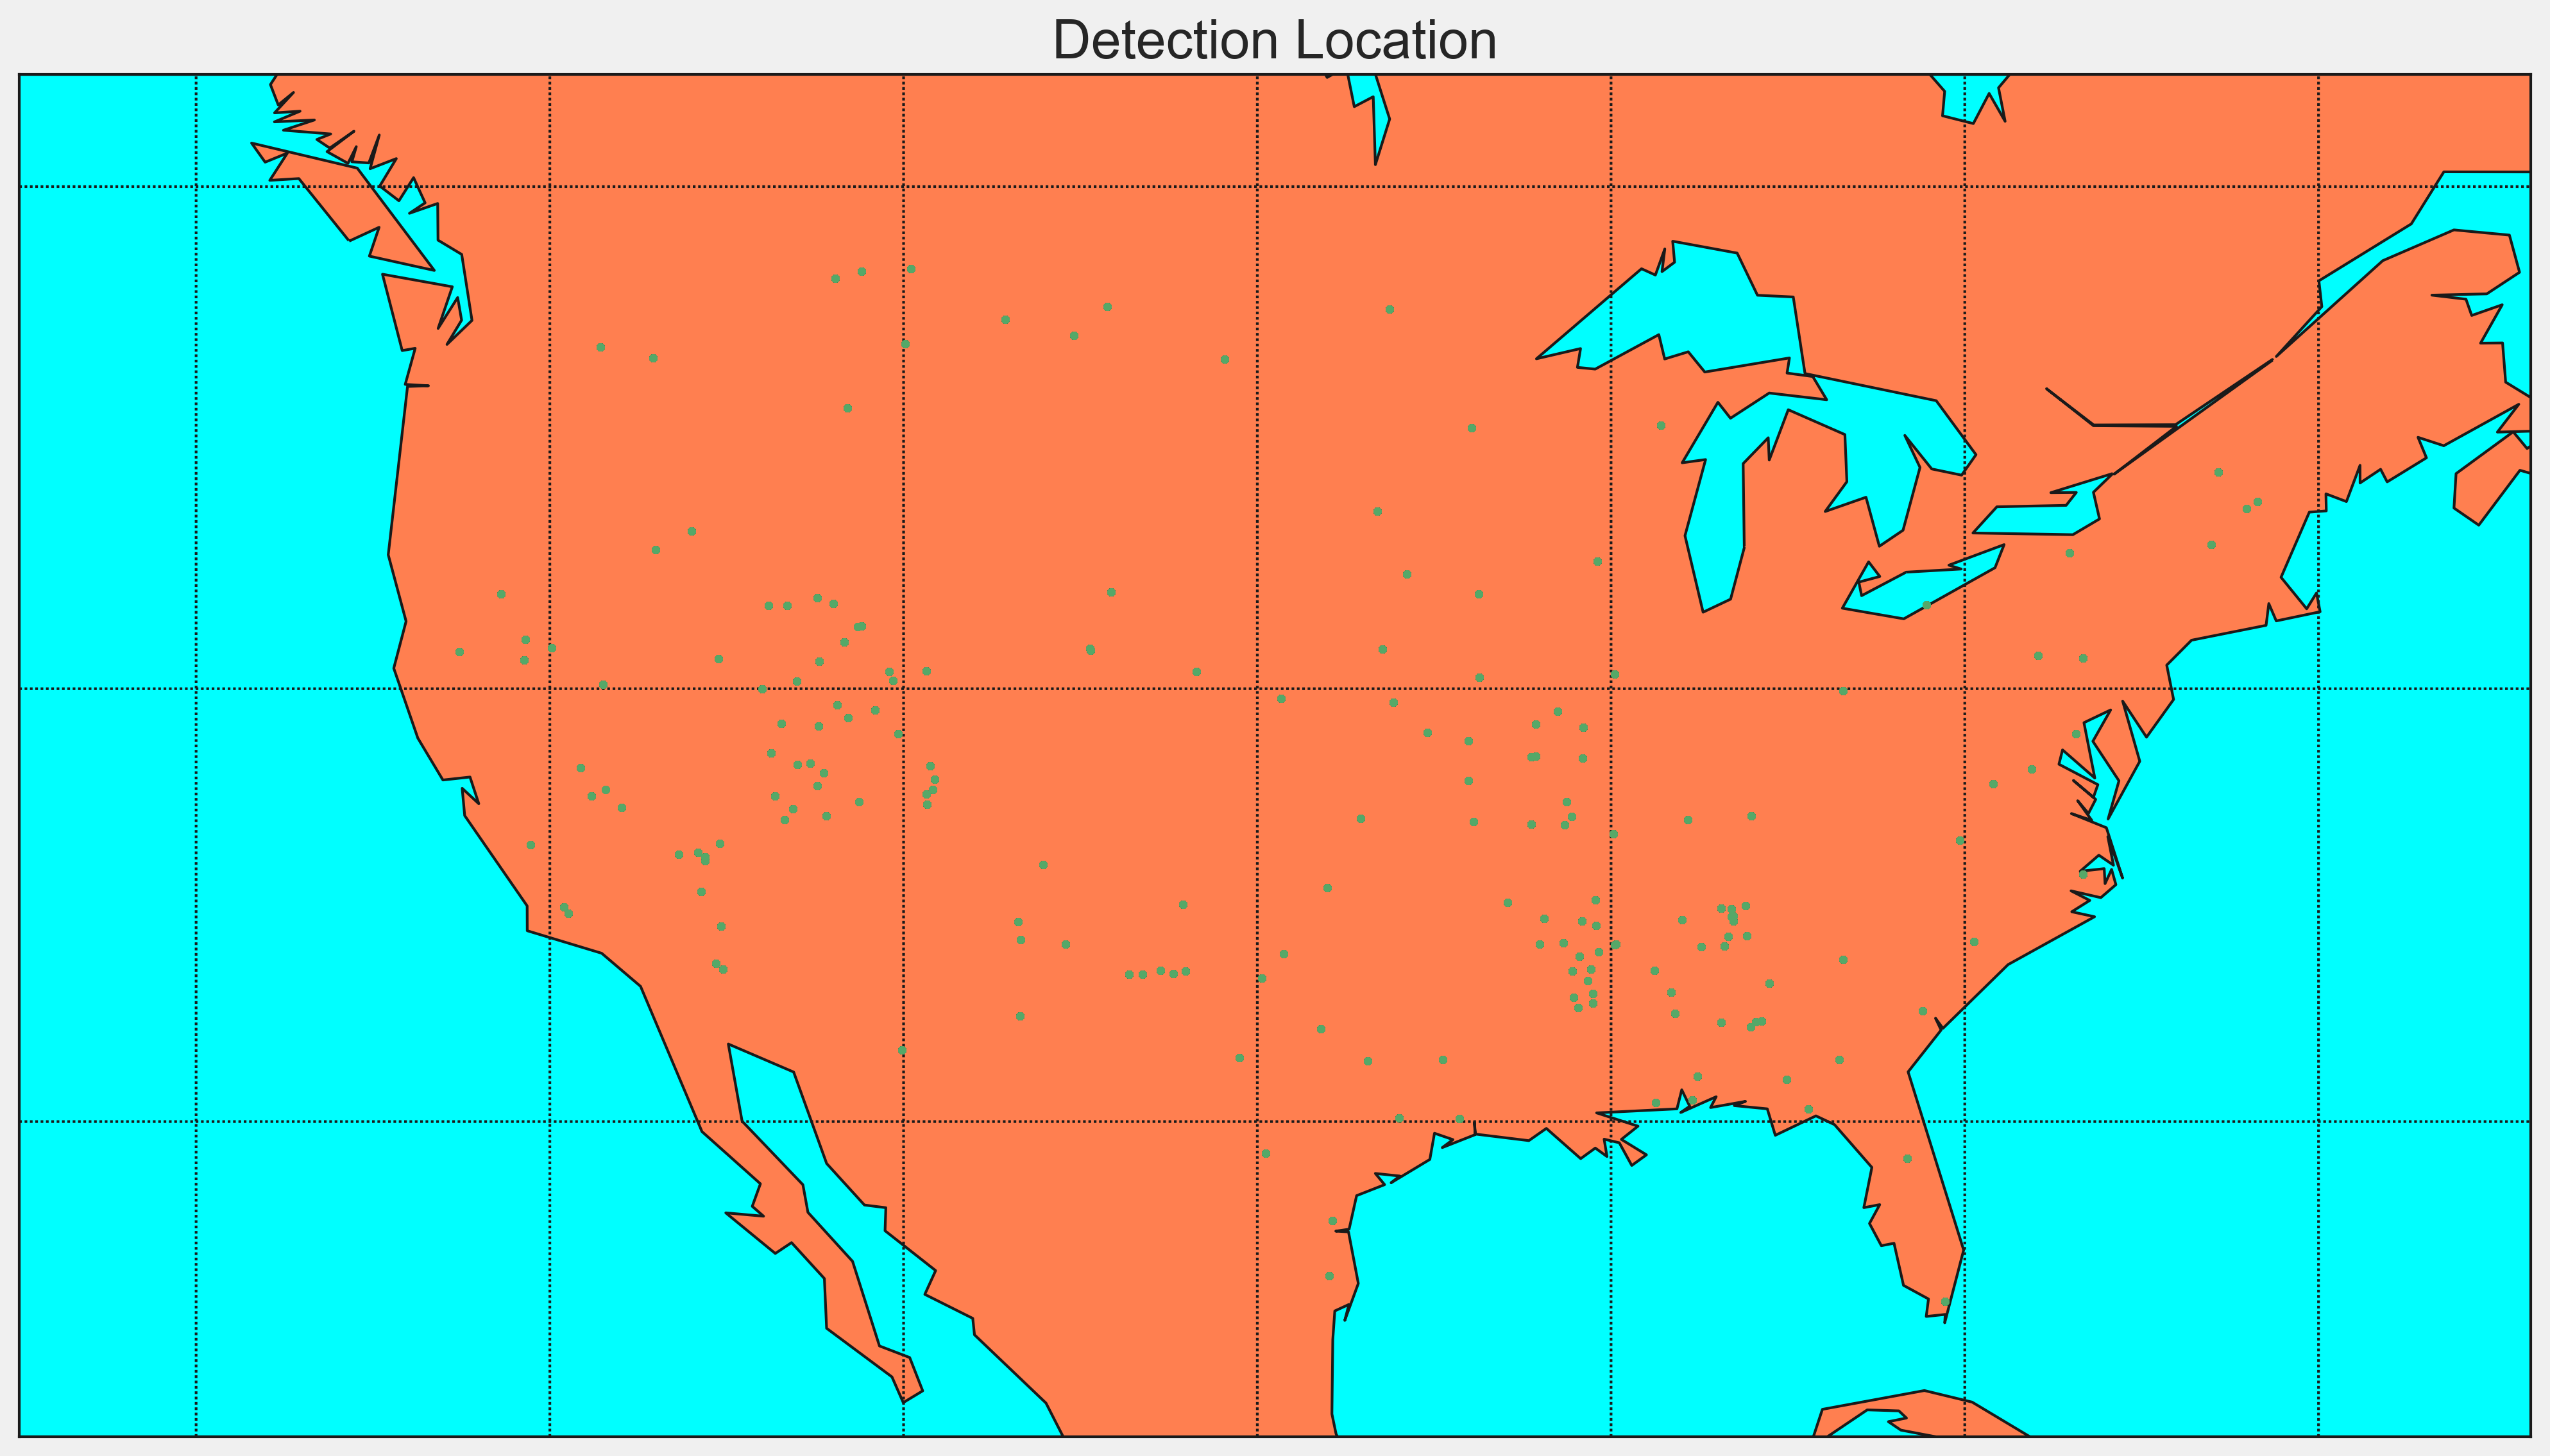

In [17]:
from mpl_toolkits.basemap import Basemap

# plot detection location 

def draw_detection_location():
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(llcrnrlon=-135,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=52,projection='merc',lat_1=33,lat_2=45,lon_0=-95)
    
    m.drawcoastlines()
    m.fillcontinents(color='coral',lake_color='aqua')
    m.drawparallels(np.arange(-90., 91., 10.))
    m.drawmeridians(np.arange(-180., 181., 10.))
    m.drawmapboundary(fill_color='aqua')

    x , y = m(np.array(df['Longitude']), np.array(df['Latitude']))
    m.plot(x,y,'g.')

    plt.title('Detection Location')
    plt.show()
    
draw_detection_location()

IQR Ranges: green and red lines
Mean: Dotted black line line
Binning Reference Values are: 309.10 ,327.30 , and 341.70


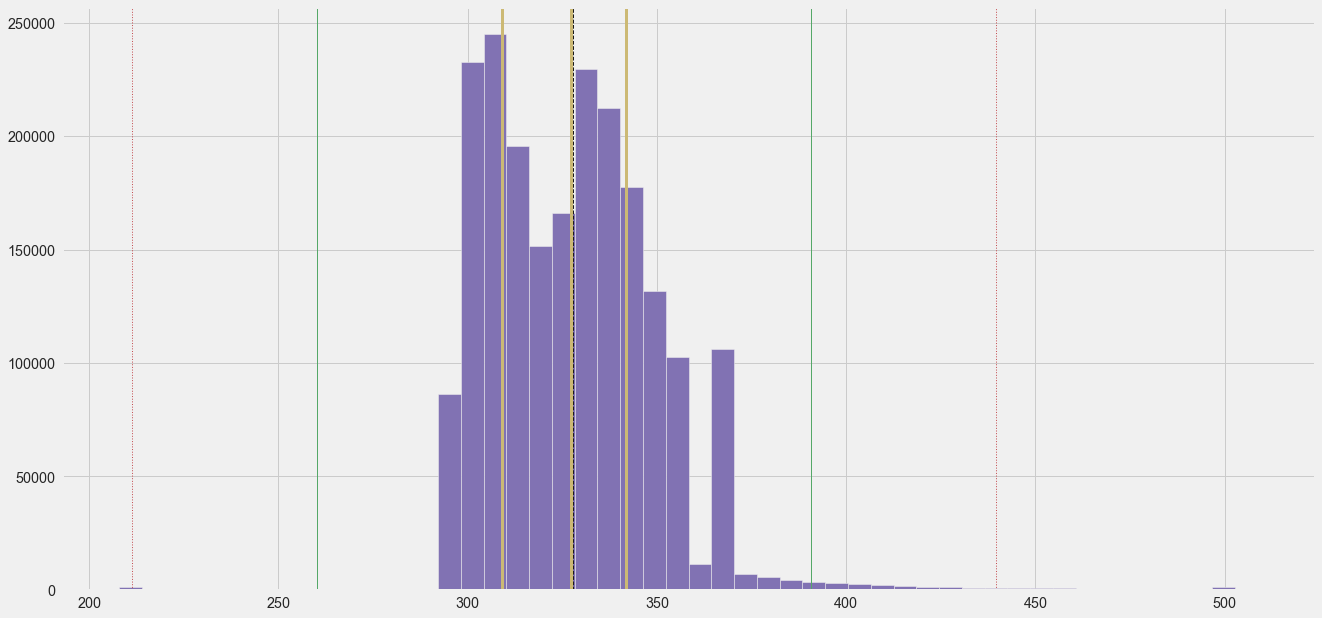

In [18]:
# use the IQR values as our binning references to bin the severely skewed Fire Intensity data

plt.hist(df['brightness'],50, color='m')

# Indicate the mean with a black dashed line
plt.axvline(df['brightness'].mean(), color='k', linestyle='dashed', linewidth=1)

# Compute the 25th, 50th, and 75th percentiles for the data
Min, Q1, median, Q3, Max = np.percentile(df['brightness'], [0,25,50,75,100])
# TODO: Calculate the IQR
IQR = Q3-Q1

# Indicate the inner and outer guides computed from the IQR
# Data outside the inner range guides are outliers
# Data outside the outer range guides are extreme values
inner_range_lower = Q1 - 1.5*IQR
inner_range_upper = Q3 + 1.5*IQR
outer_range_lower = Q1 - 3.0*IQR
outer_range_upper = Q3 + 3.0*IQR


# TODO: Plot 4 more lines for the inner and outer ranges.
# Make all of them red. 
# Make the inner ranges solid lines
# Make the outer ranges dotted lines

plt.axvline(inner_range_lower, color='g', linestyle='solid', linewidth=1)
plt.axvline(inner_range_upper, color='g', linestyle='solid', linewidth=1)
plt.axvline(outer_range_lower, color='r', linestyle='dotted', linewidth=1)
plt.axvline(outer_range_upper, color='r', linestyle='dotted', linewidth=1)
plt.axvline(Q1, color='y', linestyle='solid', linewidth=3)
plt.axvline(median, color='y', linestyle='solid', linewidth=3)
plt.axvline(Q3, color='y', linestyle='solid', linewidth=3)

plt.rcParams["figure.figsize"] =(16,9)

print(f"IQR Ranges: green and red lines")
print(f"Mean: Dotted black line line")
print(f"Binning Reference Values are: {Q1:.2f} ,{median:.2f} , and {Q3:.2f}")

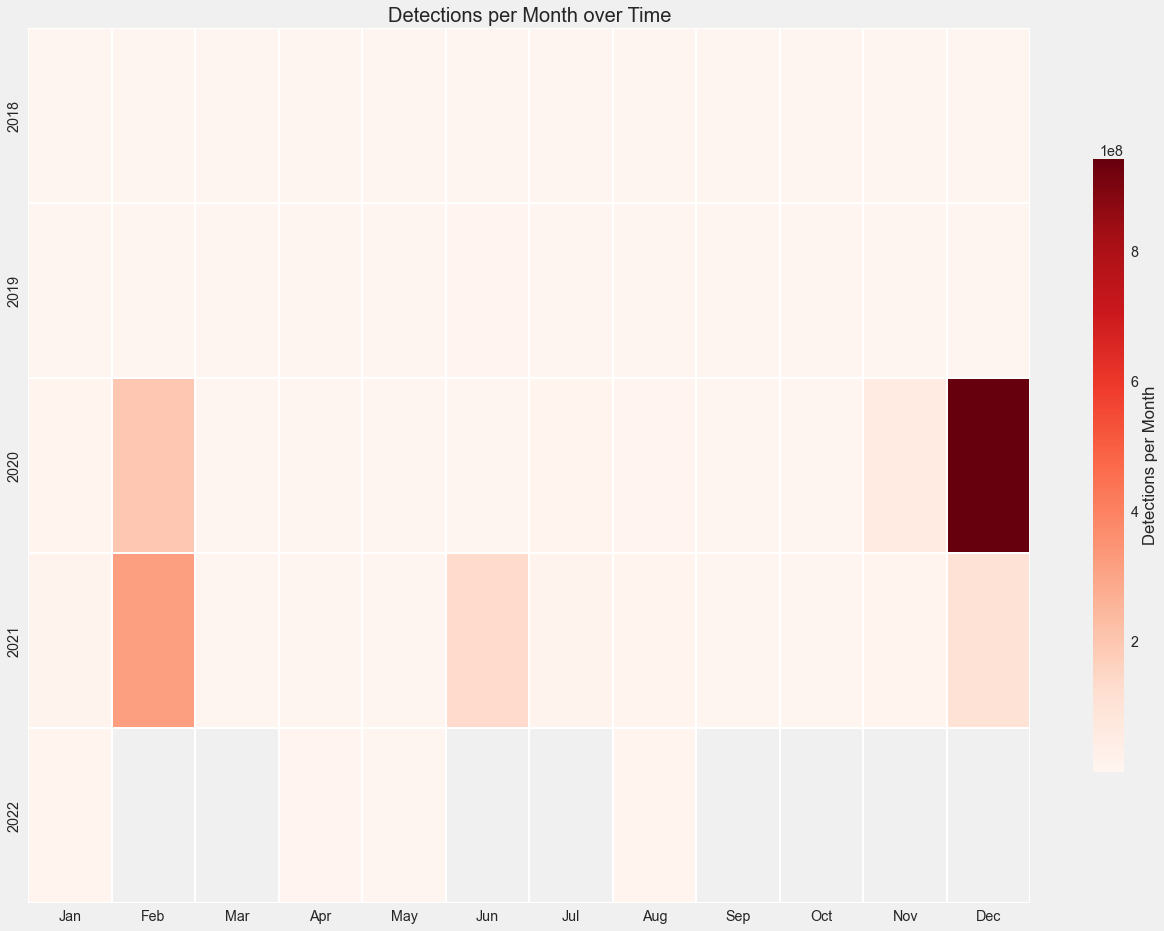

In [29]:
#we will create a new dataframe that will track the year and month of detections
month_df = df.copy()
#month_df['Month'] = [i.Month for i in month_df.Month]
#month_df['Year'] = [i.Year for i in month_df.Year]

# get the sum of fires per month
month_df = month_df.groupby(['Month', 'Year']).nearbydetections.sum()
month_df = month_df.unstack(level = 0)

# create heatmap
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(month_df, cmap = "Reds", linewidth=0.3, cbar_kws={"shrink": .7, 'label' : "Detections per Month"})
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels = xticks_labels)
plt.xlabel('')
plt.ylabel('')
ax.set_title('Detections per Month over Time',{'fontsize':20})
plt.show()

Text(0, 0.5, 'Total Detections per Month')

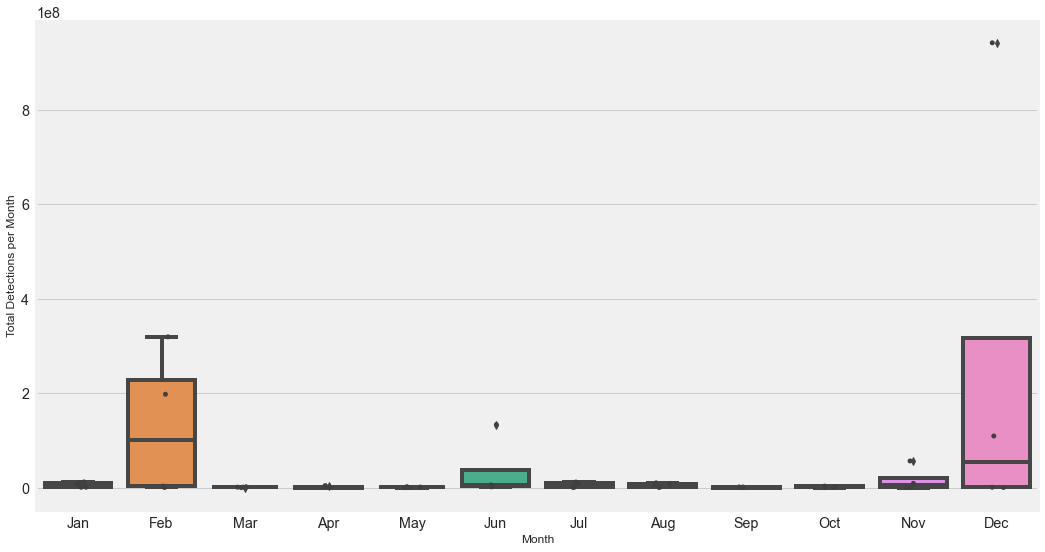

In [36]:
#using month_df from heatmap for our data here
fig, ax = plt.subplots(figsize=(16, 9))
ax = sns.boxplot(data = month_df)
ax = sns.stripplot(data=month_df, color=".25", s = 5)
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
_ = plt.xticks(np.arange(12), labels = xticks_labels)
plt.ylabel('Total Detections per Month')